In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
boston = datasets.load_boston()
# 使用Lasso回归算法预测波士顿房价
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

# 训练模型

In [2]:
lassoreg = linear_model.Lasso()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42
)
lassoreg.fit(X_train, y_train)

Lasso()

In [3]:
# 均方误差
metrics.mean_squared_error(y_train, lassoreg.predict(X_train))

27.60650506200869

In [4]:
# 决定系数（R平方）
lassoreg.score(X_train, y_train)

0.6813080948165031

# 测试模型

In [5]:
y_pred = lassoreg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

18.645326946116253

Text(0, 0.5, 'target value')

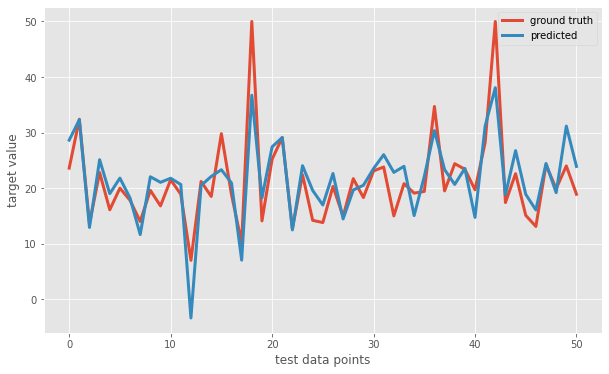

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

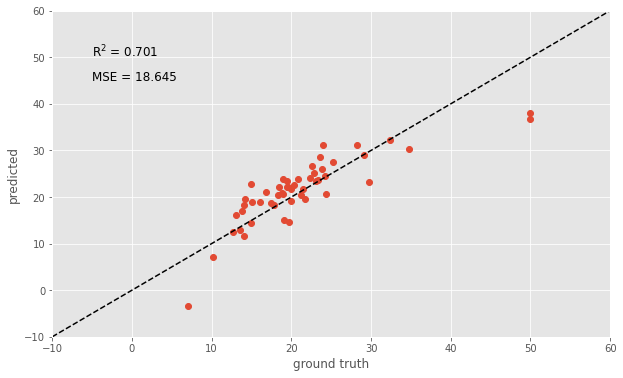

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % lassoreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);